In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("utah_property.csv")


In [3]:
pd.set_option('display.max_colwidth', None)
df[['text', 'property_type']].head()

,text,property_type
0,"Escape to tranquility with this off-grid, unfinished cabin nestled on a spacious 1.64-acre lot on a dead-end road. This unique AS-IS property offers breathtaking panoramic views, perfect for those seeking a peaceful retreat or a blank canvas to create their dream home. A prime opportunity for the handyman, this cabin provides the ideal foundation to customize and complete to your specifications. Surrounded by nature, the property offers a secluded haven with endless potential. A shed is included for buyers convivence. Whether you're looking to craft your perfect getaway or simply enjoy the raw beauty of the land, this is an opportunity not to be missed. Water needs to be hauled and power would be by generator or solar.",Affordable
1,"Beautiful home in the desirable Oak Hills and Tree streets area of Provo. Large living room and front porch with views of the valley, that make for amazing sunsets. Updated eat in kitchen, with office/work space. Large bedrooms and bathrooms throughout. Daylight basement windows make for a bright space with more gathering spaces. Beautiful landscaped yard with over an acre of land.",Luxury
2,"Welcome to your new home, nestled in the heart of Cedar City's sought-after neighborhood cedar knolls. Enjoy the convenience of being just minutes away from downtown, shopping, and schools, while still savoring the tranquility of a serene environment. This charming home features a unique secondary entrance for the basement, complete with 2 bedrooms, a kitchenette, a living room, and a bathroom. Whether you're looking for a rental opportunity or extra living space for a large family, this basement offers versatility and comfort. Designed with thoughtful consideration, the home offers a row of windows on the south side, serving as a natural solar heater, while also flooding the interior with beautiful sunlight. Meticulously maintained by its sole owner, this property exudes pride of ownership and is ready to welcome its new residents!",Affordable
3,"Investment Opportunity. House needs some work and is priced well bellow last appraisal! House is sold ''As Is''. Don't miss out on this cute, remodeled home. You'll love the well-kept lot and great red rock views! See also 138 E 100 N in Ivins if you are looking for 2 houses for multifamily or multi-generational living. Each house is on it's own parcel, and is sold separately, but makes a perfect opportunity to have a loved one living close by! Recently learned of old fire damage in the attic. Cash Buyers Only. Buyers to verify all information. Information deemed reliable, but no guaranteed.",Affordable
4,"Deer Springs Ranch is an 8000 Ac Ranch in an HOA. HOA includes 10 cabins, 3 fishing ponds, air strip, 2000 ac common area, On site manager. Lot includes .45 ac ft of water this is accessbile in DSROA owned shared well to haul water. Contact State Water Dept for drilling access. County Ordinances for building codes.",Affordable


In [4]:
print(df[['text', 'property_type']].describe(include='all'))

        text property_type
count   4440          4437
unique  3991             3
top      ...        Luxury
freq     153          1494


In [5]:
# Drop rows with missing labels
df_cleaned = df.dropna(subset=['property_type'])

# Remove short or empty descriptions
df_cleaned = df_cleaned[df_cleaned['text'].str.len() > 20]

# Remove text length outliers
lengths = df_cleaned['text'].str.len()
q1, q99 = lengths.quantile([0.01, 0.99])
df_cleaned = df_cleaned[(lengths > q1) & (lengths < q99)]

# Encode labels
label_encoder = LabelEncoder()
df_cleaned['label'] = label_encoder.fit_transform(df_cleaned['property_type'])


In [6]:
pd.reset_option('display.max_colwidth')
df_cleaned[['text', 'property_type']].head()

,text,property_type
0,"Escape to tranquility with this off-grid, unfi...",Affordable
1,Beautiful home in the desirable Oak Hills and ...,Luxury
2,"Welcome to your new home, nestled in the heart...",Affordable
3,Investment Opportunity. House needs some work ...,Affordable
4,Deer Springs Ranch is an 8000 Ac Ranch in an H...,Affordable


In [7]:
df_cleaned = df_cleaned.drop_duplicates(subset='text')

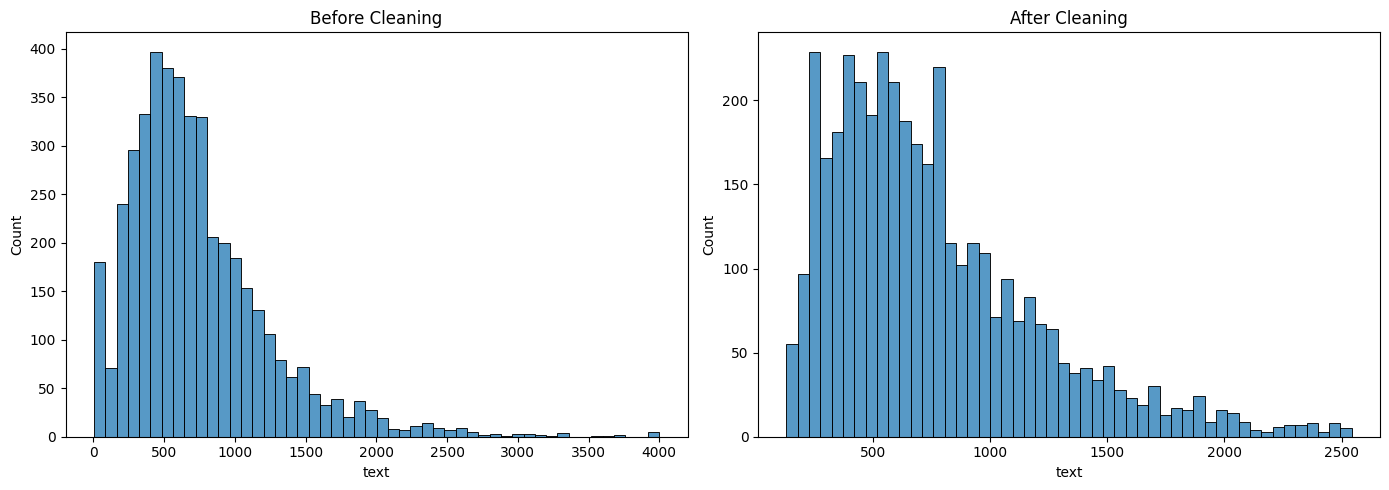

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['text'].str.len(), bins=50, ax=axs[0])
axs[0].set_title("Before Cleaning")
sns.histplot(df_cleaned['text'].str.len(), bins=50, ax=axs[1])
axs[1].set_title("After Cleaning")
plt.tight_layout()
plt.show()


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned['text'],
    df_cleaned['label'],
    test_size=0.2,
    random_state=42,
    stratify=df_cleaned['label']
)


In [10]:
print("🔹 Train Data Sample:")
print(X_train.head())
X_train.to_csv("X_TRAIN_MNB.csv")

🔹 Train Data Sample:
3067    Situated high on the Providence bench with uno...
1179    Step into your next Adventure while Creating M...
3427    Gorgeous property in Farr West. Close to freew...
2142    The best value in Provo! Come see this gorgeou...
577     The property is located at 3698 E 1520 S SPANI...
Name: text, dtype: object


In [12]:
# View first 5 rows of test set
print("\n🔹 Test Data Sample:")
print(X_test.head())
X_test.to_csv("X_TEST_MNB.csv")


🔹 Test Data Sample:
3372    Welcome to your immaculately cared for townhom...
3089    Incredible home with solid construction! Over ...
1426    Check out this quiet cul-de-sac home. Beautifu...
1167    Here's your opportunity to own 53.5 acres of o...
696     Better than new construction! This meticulousl...
Name: text, dtype: object


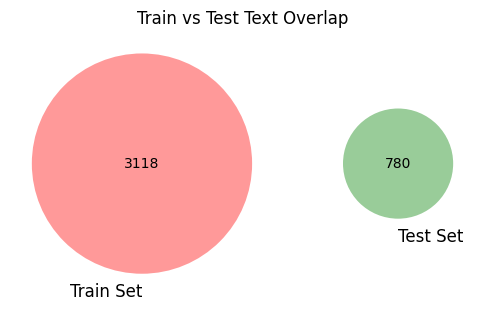

In [13]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Convert text values to sets
train_texts = set(X_train)  # if X_train is a Series of text
test_texts = set(X_test)


# Create Venn diagram
plt.figure(figsize=(6, 4))
venn2([train_texts, test_texts], set_labels=('Train Set', 'Test Set'))
plt.title("Train vs Test Text Overlap")
plt.show()


In [14]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [15]:
# Step 4: Convert a small sample to DataFrame (for display)
train_tfidf_df = pd.DataFrame(X_train_tfidf[:5].todense(), columns=tfidf.get_feature_names_out())
test_tfidf_df = pd.DataFrame(X_test_tfidf[:5].todense(), columns=tfidf.get_feature_names_out())

In [16]:
# Step 5: Display TF-IDF sample
print("🔹 Train TF-IDF Sample:")
print(train_tfidf_df.head())

🔹 Train TF-IDF Sample:
    00  000  0001  0008  0012  0014  0017  0027  0035  0053  ...  zen  zero  \
0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   0.0   
1  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   0.0   
2  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   0.0   
3  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   0.0   
4  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   0.0   

   zion  zions  zip  zline  zone  zoned  zones  zoning  
0   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  
1   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  
2   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  
3   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  
4   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  

[5 rows x 5000 columns]


In [17]:
print("\n🔹 Test TF-IDF Sample:")
print(test_tfidf_df.head())


🔹 Test TF-IDF Sample:
    00      000  0001  0008  0012  0014  0017  0027  0035  0053  ...  zen  \
0  0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   
1  0.0  0.07718   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   
2  0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   
3  0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   
4  0.0  0.00000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  0.0   

   zero  zion  zions  zip  zline  zone  zoned  zones  zoning  
0   0.0   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  
1   0.0   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  
2   0.0   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  
3   0.0   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  
4   0.0   0.0    0.0  0.0    0.0   0.0    0.0    0.0     0.0  

[5 rows x 5000 columns]


In [18]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

Classification Report:

              precision    recall  f1-score   support

  Affordable       0.65      0.59      0.62       253
     Average       0.52      0.60      0.56       262
      Luxury       0.71      0.66      0.68       265

    accuracy                           0.62       780
   macro avg       0.63      0.62      0.62       780
weighted avg       0.63      0.62      0.62       780



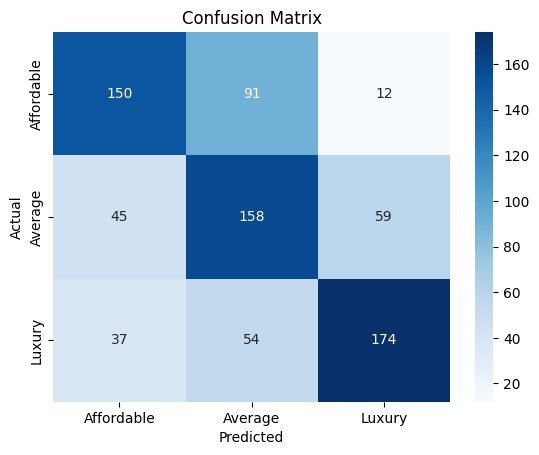

In [19]:
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
from sklearn.metrics import accuracy_score
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.62


Bernoulli Naïve Bayes

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
import pandas as pd

# Load the dataset
df = pd.read_csv("utah_property.csv")

# Drop rows with missing property_type or missing text
df = df.dropna(subset=['property_type', 'text'])

# Remove entries with very short descriptions (optional)
df = df[df['text'].str.len() > 20]

In [23]:
# Create a copy to avoid modifying the original
df_binary = df.copy()

In [24]:
# Check to confirm cleanup
print("✅ Null values after cleaning:\n")
print(df.isnull().sum())

✅ Null values after cleaning:

type             0
text             0
year_built       0
beds             0
baths            0
baths_full       0
baths_half       0
garage           0
lot_sqft         0
sqft             0
stories          0
lastSoldOn       0
listPrice        0
status           0
property_type    0
dtype: int64


In [25]:
df.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldOn,listPrice,status,property_type
0,single_family,"Escape to tranquility with this off-grid, unfi...",2020.0,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,2.0,2018-05-31,90000.0,for_sale,Affordable
1,single_family,Beautiful home in the desirable Oak Hills and ...,1968.0,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,2.0,2018-05-31,799000.0,for_sale,Luxury
2,single_family,"Welcome to your new home, nestled in the heart...",1985.0,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,2.0,2018-05-31,389900.0,for_sale,Affordable
3,single_family,Investment Opportunity. House needs some work ...,1936.0,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,2.0,2018-04-16,300000.0,for_sale,Affordable
4,land,Deer Springs Ranch is an 8000 Ac Ranch in an H...,2003.0,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,2.0,2018-05-31,70000.0,for_sale,Affordable


In [26]:
# Step 3: Create binary features
df_binary['has_garage'] = (df['garage'] > 0).astype(int)
df_binary['has_multiple_beds'] = (df['beds'] >= 3).astype(int)
df_binary['has_two_or_more_baths'] = (df['baths'] >= 2).astype(int)
df_binary['is_large_property'] = (df['sqft'] > 2000).astype(int)
df_binary['mentions_luxury'] = df['text'].str.lower().str.contains("luxury").astype(int)
df_binary['has_pool'] = df['text'].str.lower().str.contains("pool").astype(int)
df_binary['has_fireplace'] = df['text'].str.lower().str.contains("fireplace").astype(int)

# Step 4: Create binary target variable
df_binary['is_luxury'] = (df_binary['property_type'] == 'Luxury').astype(int)

In [27]:
df_binary.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,...,status,property_type,has_garage,has_multiple_beds,has_two_or_more_baths,is_large_property,mentions_luxury,has_pool,has_fireplace,is_luxury
0,single_family,"Escape to tranquility with this off-grid, unfi...",2020.0,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,...,for_sale,Affordable,1,0,0,0,0,0,0,0
1,single_family,Beautiful home in the desirable Oak Hills and ...,1968.0,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,...,for_sale,Luxury,1,1,1,1,0,0,0,1
2,single_family,"Welcome to your new home, nestled in the heart...",1985.0,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,...,for_sale,Affordable,1,1,1,1,0,0,0,0
3,single_family,Investment Opportunity. House needs some work ...,1936.0,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,...,for_sale,Affordable,1,1,1,1,0,0,0,0
4,land,Deer Springs Ranch is an 8000 Ac Ranch in an H...,2003.0,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,...,for_sale,Affordable,1,1,0,1,0,0,0,0


In [30]:
df_binary = df_binary.drop_duplicates(subset=features)

In [31]:

# Step 5: Prepare feature and target variables
features = [
    'has_garage', 'has_multiple_beds', 'has_two_or_more_baths',
    'is_large_property', 'mentions_luxury', 'has_pool', 'has_fireplace'
]
X = df_binary[features]
y = df_binary['is_luxury']

In [32]:
print("✅ Cleaned Data Sample:")
print(df_binary[features + ['is_luxury']].head())

✅ Cleaned Data Sample:
   has_garage  has_multiple_beds  has_two_or_more_baths  is_large_property  \
0           1                  0                      0                  0   
1           1                  1                      1                  1   
4           1                  1                      0                  1   
5           1                  1                      1                  0   
7           1                  1                      1                  1   

   mentions_luxury  has_pool  has_fireplace  is_luxury  
0                0         0              0          0  
1                0         0              0          1  
4                0         0              0          0  
5                0         0              0          0  
7                0         1              0          1  


In [33]:
# Step 6: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
# View X_train with labels
print("🔹 X_train with labels:")
print(pd.concat([X_train, y_train], axis=1).head())
X_train.to_csv("X_train_BNB.csv")

🔹 X_train with labels:
      has_garage  has_multiple_beds  has_two_or_more_baths  is_large_property  \
3662           1                  1                      0                  0   
3261           1                  1                      0                  0   
489            1                  1                      1                  0   
21             1                  1                      1                  0   
218            1                  0                      1                  0   

      mentions_luxury  has_pool  has_fireplace  is_luxury  
3662                1         0              0          0  
3261                0         1              0          0  
489                 1         0              1          1  
21                  0         1              0          0  
218                 1         1              0          1  


In [35]:
# View X_test with labels
print("\n🔹 X_test with labels:")
print(pd.concat([X_test, y_test], axis=1).head())
X_test.to_csv("X_test_BNB.csv")


🔹 X_test with labels:
      has_garage  has_multiple_beds  has_two_or_more_baths  is_large_property  \
1276           1                  0                      0                  0   
124            1                  0                      0                  0   
82             1                  1                      1                  0   
1292           1                  0                      1                  1   
277            1                  0                      1                  0   

      mentions_luxury  has_pool  has_fireplace  is_luxury  
1276                0         1              1          0  
124                 0         1              0          0  
82                  0         0              1          0  
1292                0         1              0          0  
277                 0         1              1          1  


In [36]:
# Combine feature columns into string for comparison
train_rows = X_train.astype(str).agg('-'.join, axis=1)
test_rows = X_test.astype(str).agg('-'.join, axis=1)

# Check for overlaps
common_rows = set(train_rows).intersection(set(test_rows))

# Show result
if common_rows:
    print(f"❌ Not disjoint: {len(common_rows)} overlapping rows found.")
else:
    print("✅ X_train and X_test are disjoint.")


✅ X_train and X_test are disjoint.


In [37]:
# Step 7: Train Bernoulli Naive Bayes model
bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train)

# Step 8: Make predictions and evaluate
y_pred = bnb_model.predict(X_test)

In [38]:
# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", report)

Model Accuracy: 77.78%

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.33      0.50         3

    accuracy                           0.78         9
   macro avg       0.88      0.67      0.68         9
weighted avg       0.83      0.78      0.74         9



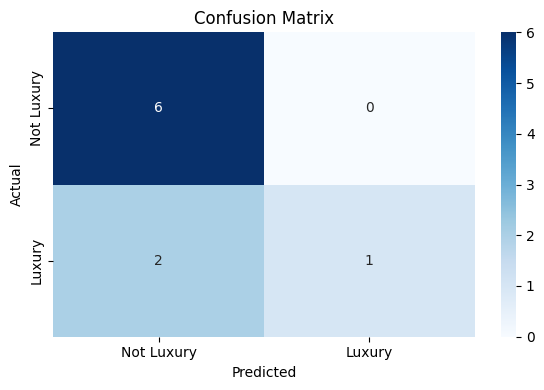

In [39]:
# Step 9: Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Luxury', 'Luxury'],
            yticklabels=['Not Luxury', 'Luxury'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Categorical Naïve Bayes

In [40]:
# Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [41]:
# Step 2: Load the dataset and drop missing labels
df = pd.read_csv("utah_property.csv")
df = df.dropna(subset=['property_type'])


In [42]:
df.count()

,0
type,4437
text,4437
year_built,4437
beds,4437
baths,4437
baths_full,4437
baths_half,4437
garage,4437
lot_sqft,4437
sqft,4437


In [43]:
# Step 3: Bin numerical features into categories
df['bed_cat'] = pd.cut(df['beds'], bins=[0, 2, 4, 10], labels=['1-2', '3-4', '5+'])
df['bath_cat'] = pd.cut(df['baths'], bins=[-1, 1, 2, 5], labels=['0-1', '2', '3+'])
df['garage_cat'] = pd.cut(df['garage'], bins=[-1, 0, 2, 10], labels=['None', '1-2', '3+'])
df['story_cat'] = pd.cut(df['stories'], bins=[0, 1, 2, 10], labels=['1', '2', '3+'])


In [44]:
df.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldOn,listPrice,status,property_type,bed_cat,bath_cat,garage_cat,story_cat
0,single_family,"Escape to tranquility with this off-grid, unfi...",2020.0,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,2.0,2018-05-31,90000.0,for_sale,Affordable,1-2,0-1,1-2,2
1,single_family,Beautiful home in the desirable Oak Hills and ...,1968.0,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,2.0,2018-05-31,799000.0,for_sale,Luxury,3-4,3+,1-2,2
2,single_family,"Welcome to your new home, nestled in the heart...",1985.0,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,2.0,2018-05-31,389900.0,for_sale,Affordable,3-4,3+,1-2,2
3,single_family,Investment Opportunity. House needs some work ...,1936.0,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,2.0,2018-04-16,300000.0,for_sale,Affordable,3-4,2,1-2,2
4,land,Deer Springs Ranch is an 8000 Ac Ranch in an H...,2003.0,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,2.0,2018-05-31,70000.0,for_sale,Affordable,3-4,0-1,1-2,2


In [46]:
# Step 4: Choose categorical features and remove rows with missing binned values
categorical_cols = ['type', 'status', 'bed_cat', 'bath_cat', 'garage_cat', 'story_cat']
df = df.dropna(subset=categorical_cols)


In [47]:
print("✅ Cleaned Data Sample:")
print(df[categorical_cols + ['property_type']].head())

✅ Cleaned Data Sample:
            type    status bed_cat bath_cat garage_cat story_cat property_type
0  single_family  for_sale     1-2      0-1        1-2         2    Affordable
1  single_family  for_sale     3-4       3+        1-2         2        Luxury
2  single_family  for_sale     3-4       3+        1-2         2    Affordable
3  single_family  for_sale     3-4        2        1-2         2    Affordable
4           land  for_sale     3-4      0-1        1-2         2    Affordable


In [48]:
# Step 5: Split into training and testing sets before encoding
X = df[categorical_cols].copy()
y = df['property_type'].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [49]:
print("🧪 X_train Sample:")
print(X_train.head())


🧪 X_train Sample:
               type    status bed_cat bath_cat garage_cat story_cat
1428  single_family  for_sale     3-4        2        1-2         2
3732      townhomes  for_sale     3-4       3+        1-2         2
1321  single_family  for_sale     3-4        2         3+         2
724   single_family  for_sale     3-4       3+         3+         2
503          condos  for_sale     3-4       3+        1-2         2


In [50]:
print("\n🧪 X_test Sample:")
print(X_test.head())


🧪 X_test Sample:
               type    status bed_cat bath_cat garage_cat story_cat
1424  single_family  for_sale     3-4        2         3+         2
4012  single_family  for_sale     3-4        2        1-2         2
2976         mobile  for_sale     3-4        2        1-2         1
3033  single_family  for_sale     3-4       3+        1-2         2
4317  single_family  for_sale     3-4        2        1-2         2


In [51]:
# Step 6: Encode each categorical column using LabelEncoder (safely)
label_encoders = {}
for col in X_train.columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    label_encoders[col] = le


In [52]:
# Step 7: Remove rows from X_test that contain unknown labels (-1)
mask_valid = ~(X_test == -1).any(axis=1)
X_test = X_test[mask_valid]
y_test = y_test.loc[X_test.index]


In [53]:
# Step 8: Encode the target variable
target_encoder = LabelEncoder()
y_train_enc = target_encoder.fit_transform(y_train)
y_test_enc = target_encoder.transform(y_test)


In [54]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [55]:
# Display Encoded Training Labels
print("🎯 Encoded Training Labels:")
print(pd.DataFrame({
    'Original Label': y_train,
    'Encoded Label': y_train_enc
}).head())


🎯 Encoded Training Labels:
  Original Label  Encoded Label
0        Average              1
1     Affordable              0
2         Luxury              2
3         Luxury              2
4     Affordable              0


In [56]:
# Display Encoded Test Labels
print("\n🎯 Encoded Test Labels:")
print(pd.DataFrame({
    'Original Label': y_test,
    'Encoded Label': y_test_enc
}).head())


🎯 Encoded Test Labels:
  Original Label  Encoded Label
0         Luxury              2
1     Affordable              0
2     Affordable              0
3        Average              1
4        Average              1


In [60]:
# Combine features and target for saving
train_data = X_train.copy()
train_data['property_type'] = y_train.values

test_data = X_test.copy()
test_data['property_type'] = y_test.values

# Save to CSV
train_data.to_csv("train_sample_cnb.csv", index=False)
test_data.to_csv("test_sample_cnb.csv", index=False)

print("✅ Training and testing data saved as 'train_sample.csv' and 'test_sample.csv'")


✅ Training and testing data saved as 'train_sample.csv' and 'test_sample.csv'


In [61]:
# Display final encoded training data
print("\n📘 Final Encoded Training Data (used for model training):")
display(pd.concat([X_train.reset_index(drop=True), pd.Series(y_train_enc, name='Encoded_Target')], axis=1).head())

# Display final encoded testing data
print("\n📙 Final Encoded Testing Data (used for model testing):")
display(pd.concat([X_test.reset_index(drop=True), pd.Series(y_test_enc, name='Encoded_Target')], axis=1).head())



📘 Final Encoded Training Data (used for model training):


,type,status,bed_cat,bath_cat,garage_cat,story_cat,Encoded_Target
0,8,0,1,1,0,1,1
1,9,0,1,2,0,1,0
2,8,0,1,1,1,1,2
3,8,0,1,2,1,1,2
4,3,0,1,2,0,1,0



📙 Final Encoded Testing Data (used for model testing):


,type,status,bed_cat,bath_cat,garage_cat,story_cat,Encoded_Target
0,8,0,1,1,1,1,2
1,8,0,1,1,0,1,0
2,6,0,1,1,0,0,0
3,8,0,1,2,0,1,1
4,8,0,1,1,0,1,1


In [57]:
# Step 9: Train the Categorical Naive Bayes model
cat_nb = CategoricalNB()
cat_nb.fit(X_train, y_train_enc)


CategoricalNB()

In [58]:
# Step 10: Evaluate the model
y_pred = cat_nb.predict(X_test)
accuracy = accuracy_score(y_test_enc, y_pred)
report = classification_report(y_test_enc, y_pred, target_names=target_encoder.classes_)

print(f"Model Accuracy: {accuracy * 100:.2f}%\n")
print("Classification Report:\n", report)


Model Accuracy: 66.86%

Classification Report:
               precision    recall  f1-score   support

  Affordable       0.75      0.75      0.75       291
     Average       0.56      0.63      0.60       296
      Luxury       0.72      0.62      0.67       270

    accuracy                           0.67       857
   macro avg       0.68      0.67      0.67       857
weighted avg       0.68      0.67      0.67       857



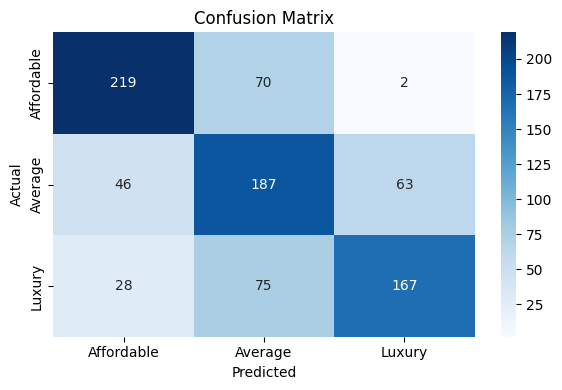

In [59]:
# Step 11: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test_enc, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
